In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1- Import Library

In [2]:
import numpy as np #allow efficient mathematical operations on arrays.Used for numerical computations, linear algebra, and data manipulation.
import pandas as pd #provides data structures (Series and DataFrame) for handling and analyzing tabular data
import os
import matplotlib.pyplot as plt # for creating visualizations
import glob #Used for batch processing files with similar names or extensions
import nibabel as nib #neuroscience and medical imaging research.
import cv2 #rovides functions for image manipulation, feature extraction, and object detection
import imageio #for reading and writing image data, oading images into memory, creating animations, and saving visualizations
from tqdm.notebook import tqdm #Useful for tracking the progress of time-consuming operations (e.g., data processing, downloads).
from ipywidgets import * #for creating dynamic visualizations and interactive controls
from PIL import Image #for creating dynamic visualizations and interactive controls
from fastai.basics import * #for building custom models and working with data pipelines
from fastai.vision.all import * #for image classification, and segmentation
from fastai.data.transforms import * #provides various data transformation functions
import random #for simulations, shuffling data, and creating random samples
from matplotlib.pyplot import figure #Used for creating charts, histograms, scatter plots, and other types of graphs
import nibabel as nib #used for reading and writing NIfTI files
from sklearn.model_selection import train_test_split #to split a dataset into training and testing sets
from tensorflow.keras.layers import *#use to build the architecture of a neural network model.
from tensorflow.keras.models import Model #llows to create a model by specifying its inputs and outputs.
from tensorflow.keras.optimizers import Adam

2- Data Preprocessing

In [7]:
files=[]
for dirname, _,filenames in os.walk('dataset/segmentations/images/images'):
    for filename in filenames:
        files.append((dirname, filename))

In [9]:
# Create a DataFrame from the file list
df_files = pd.DataFrame(files, columns=['dirname', 'filename'])

# Sort the DataFrame by filename in ascending order
df_files = df_files.sort_values(by='filename')

# Display the DataFrame
print(df_files.head())

                               dirname              filename
0  dataset/segmentations/images/images    segmentation-0.nii
1  dataset/segmentations/images/images    segmentation-1.nii
2  dataset/segmentations/images/images   segmentation-10.nii
3  dataset/segmentations/images/images  segmentation-100.nii
4  dataset/segmentations/images/images  segmentation-101.nii


In [19]:
import os
import pandas as pd

# Example: df_files structure. Ensure it contains at least the 'filename' column.
df_files = pd.DataFrame({'filename': ['image_000.nii', 'image_001.nii', 'image_002.nii', 'image_003.nii']})  # Example filenames

# Assuming the paths to the input directories are as follows:
image_dir = "input/image"  # Path to the image directory
mask_dir = "input/mask"    # Path to the mask directory

# Ensure that 'filename' column exists in df_files
if not df_files.empty and 'filename' in df_files.columns:
    df_files["mask_dirname"] = ""
    df_files["mask_filename"] = ""

    # Loop through and match filenames
    for i in range(131):  # Adjust this range as needed (131 files assumed here)
        # Construct the filenames for images and masks based on the index
        ct = f"image_{i:03d}.nii"  # CT scan image filename (formatted as image_000.nii, image_001.nii, etc.)
        mask = f"mask_{i:03d}.nii"  # Mask filename (formatted as segmentation_000.nii, etc.)

        # Debugging: Check if filenames match
        print(f"Checking for {ct} in df_files['filename']")

        # Check if the CT filename exists in df_files
        if ct in df_files['filename'].values:
            print(f"Match found for {ct}")
            # Construct the paths for the CT image and mask
            ct_path = os.path.join(image_dir, ct)
            mask_path = os.path.join(mask_dir, mask)

            # Debugging: Check if the files exist on disk
            print(f"Checking if {ct_path} exists: {os.path.exists(ct_path)}")
            print(f"Checking if {mask_path} exists: {os.path.exists(mask_path)}")

            # If both files exist, update the df_files DataFrame
            if os.path.exists(ct_path) and os.path.exists(mask_path):
                df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
                df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = mask_dir

    # Drop rows where mask_filename is empty (files that do not have a corresponding mask)
    df_files = df_files[df_files['mask_filename'] != ''].sort_values(by=['filename']).reset_index(drop=True)

    # Print the updated DataFrame
    print(df_files)
else:
    print("Error: 'df_files' is empty or 'filename' column is missing.")


Checking for image_000.nii in df_files['filename']
Match found for image_000.nii
Checking if input/image\image_000.nii exists: True
Checking if input/mask\mask_000.nii exists: True
Checking for image_001.nii in df_files['filename']
Match found for image_001.nii
Checking if input/image\image_001.nii exists: True
Checking if input/mask\mask_001.nii exists: True
Checking for image_002.nii in df_files['filename']
Match found for image_002.nii
Checking if input/image\image_002.nii exists: True
Checking if input/mask\mask_002.nii exists: True
Checking for image_003.nii in df_files['filename']
Match found for image_003.nii
Checking if input/image\image_003.nii exists: True
Checking if input/mask\mask_003.nii exists: True
Checking for image_004.nii in df_files['filename']
Checking for image_005.nii in df_files['filename']
Checking for image_006.nii in df_files['filename']
Checking for image_007.nii in df_files['filename']
Checking for image_008.nii in df_files['filename']
Checking for image_00

## 3-Read 'Nii' File

In [26]:
import os
import pandas as pd
import nibabel as nib
import numpy as np

# Assuming the df_files DataFrame has a column 'filename'
df_files = pd.DataFrame({'filename': ['image_000.nii', 'image_001.nii', 'image_002.nii', 'image_003.nii']})  # Example filenames

# Directories where the images and masks are stored
image_dir = "input/image"
mask_dir = "input/mask"

# Add the missing columns (dirname and mask_dirname) based on image and mask directory paths
df_files['dirname'] = image_dir  # Assuming all images are in the same directory
df_files['mask_dirname'] = mask_dir  # Assuming all masks are in the same directory

# Assuming 'mask_filename' and 'filename' are populated correctly
df_files["mask_filename"] = df_files["filename"].apply(lambda x: "mask_" + x.split('_')[1])  # This is just an example

# Function to read NIfTI files
def read_nii(filepath):
    ct_scan = nib.load(filepath)  # Load the NIfTI file using the nibabel library
    array = ct_scan.get_fdata()   # Get the data as a numpy array
    array = np.rot90(np.array(array))  # Rotate the array by 90 degrees counter-clockwise
    return(array)  # Return the rotated array

# Set the variable 'sample' to 40
sample = 3

# Check if the sample index exists in the dataframe
if sample < len(df_files):
    # Read a CT scan file using the 'read_nii' function
    sample_ct = read_nii(df_files.loc[sample, 'dirname'] + "/" + df_files.loc[sample, 'filename'])

    # Read a Mask scan file using the 'read_nii' function
    sample_mask = read_nii(df_files.loc[sample, 'mask_dirname'] + "/" + df_files.loc[sample, 'mask_filename'])

    # Display the shape of the CT and Mask images
    print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')
else:
    print(f"Error: Sample index {sample} is out of range for the DataFrame.")


CT Shape:   (512, 512)
Mask Shape: (512, 512)


In [23]:
print(len(df_files))  # This will tell you how many rows are in df_files


4


In [27]:
# Check the size of the DataFrame
print(f"Number of rows in df_files: {len(df_files)}")

# Check the first few rows of df_files
print("First few rows of df_files:")
print(df_files.head())

# Set the variable 'sample' to a valid index
sample = 4

# Check if the sample index exists in the DataFrame
if sample < len(df_files):
    # Read a CT scan file using the 'read_nii' function
    sample_ct = read_nii(df_files.loc[sample, 'dirname'] + "/" + df_files.loc[sample, 'filename'])

    # Read a Mask scan file using the 'read_nii' function
    sample_mask = read_nii(df_files.loc[sample, 'mask_dirname'] + "/" + df_files.loc[sample, 'mask_filename'])

    # Display the shape of the CT and Mask images
    print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')
else:
    print(f"Error: Sample index {sample} is out of range for the DataFrame.")


Number of rows in df_files: 4
First few rows of df_files:
        filename      dirname mask_dirname mask_filename
0  image_000.nii  input/image   input/mask  mask_000.nii
1  image_001.nii  input/image   input/mask  mask_001.nii
2  image_002.nii  input/image   input/mask  mask_002.nii
3  image_003.nii  input/image   input/mask  mask_003.nii
Error: Sample index 4 is out of range for the DataFrame.


## 3.1- Preprocess the 'nii' file

In [30]:
# Ensure the sample_ct[..., 55] slice is 2D
slice_2d = sample_ct[..., 55]  # Shape should be (512, 512) or similar

# If the slice is 1D (i.e., shape is (512,)), reshape it into 2D if needed
if slice_2d.ndim == 1:
    slice_2d = slice_2d.reshape(512, 512)

# Apply the windowing to the slice and plot it
windowed_slice = tensor(slice_2d.astype(np.float32)).windowed(*dicom_windows.liver)

# Plot the result
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(windowed_slice, cmap=plt.cm.bone)
plt.show()


ValueError: cannot reshape array of size 512 into shape (512,512)

TypeError: Invalid shape (512,) for image data

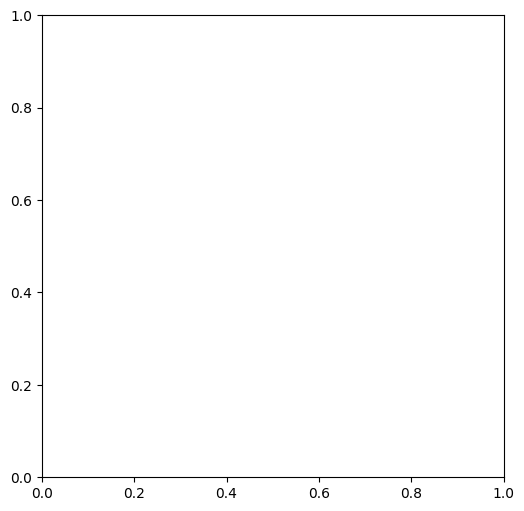

In [32]:
# Preprocess the nii file
#it extends the functionality of PyTorch's
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)
#This decorator is used to add a new method windowed to the Tensor class.
@patch
#The result is a tensor with pixel values scaled between 0 and 1, representing the windowed image.
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)
#It appears you're applying the liver window settings (dicom_windows.liver) to the slice to visualize the liver tissue in the CT scan
plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

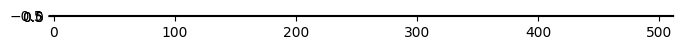

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `sample_ct` is a 3D numpy array with shape (height, width, num_slices)
# Select a specific slice (55th slice in the 3rd dimension)
ct_slice = sample_ct[..., 55].astype(np.float32)

# Ensure the slice is 2D before passing it to imshow()
if ct_slice.ndim == 1:
    ct_slice = np.reshape(ct_slice, (1, -1))  # Reshape to 2D if it's 1D

# Now apply the windowing function and display the image
figure(figsize=(8, 6), dpi=100)
plt.imshow(tensor(ct_slice).windowed(*dicom_windows.liver), cmap=plt.cm.bone)
plt.show()


In [36]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI file containing the volume
volume_nifti = nib.load('input/image/image_000.nii')

# Load the NIfTI file containing the segmentation image
segmentation_nifti = nib.load('input/mask/mask_000.nii')

# Extract the data arrays from the NIfTI files
volume_data = volume_nifti.get_fdata()
segmentation_data = segmentation_nifti.get_fdata()

# Choose a slice to display (e.g., slice 0 along the first axis)
slice_index = 0

# Check the shape of the volume data
print("Volume data shape:", volume_data.shape)
print("Segmentation data shape:", segmentation_data.shape)

# Make sure to extract a 2D slice from the 3D volume
volume_slice = volume_data[:, :, slice_index]  # This gives a 2D slice
segmentation_slice = segmentation_data[:, :, slice_index]  # This gives a 2D slice

# Plot the volume slice
plt.subplot(1, 2, 1)
plt.imshow(volume_slice, cmap='gray')
plt.title(f'Volume Slice {slice_index}')
plt.axis('off')

# Plot the segmentation slice
plt.subplot(1, 2, 2)
plt.imshow(segmentation_slice, cmap='jet')  # Adjust the colormap as needed
plt.title(f'Segmentation Slice {slice_index}')
plt.axis('off')

plt.show()


Volume data shape: (512, 512)
Segmentation data shape: (512, 512)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [9]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    #presumably a medical image, converts it to a PyTorch tensor, and applies windowing using the parameters from dicom_windows.liver. It uses the 'bone' color map for visualization, adds a title "Windowed Image", and turns off the axis.
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.show()

In [38]:
sample = 3

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

NameError: name 'plot_sample' is not defined

## 3.3- Preprocessing Functions

<Axes: >

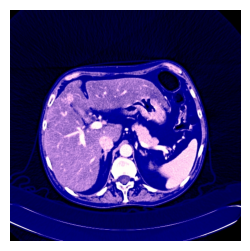

In [11]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'} #a subclass of a PyTorch Tensor designed to handle black-and-white images.

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120): #unction to convert the tensor to a multi-channel image suitable for saving as a JPG.The image is saved with the specified quality.
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

## 4- Generate Unet Training Image From 'nii' File

In [12]:
GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    ## test folder
    os.makedirs('test_images', exist_ok=True)
    os.makedirs('test_masks', exist_ok=True)

    # Split the data into train and test sets
    train_df, test_df = train_test_split(df_files, test_size=0.1, random_state=42)

    # Check if train_df is empty
    print("Length of train_df:", len(train_df))

    # Reset index for contiguous indices
    train_df = train_df.reset_index(drop=True)
    # Check if test_df is empty
    print("Length of test_df:", len(test_df))
    test_df = test_df.reset_index(drop=True)

    # Loop for training set
    for ii in tqdm(range(len(train_df))):
        curr_ct = read_nii(train_df.loc[ii, 'dirname'] + "/" + train_df.loc[ii, 'filename'])
        curr_mask = read_nii(train_df.loc[ii, 'mask_dirname'] + "/" + train_df.loc[ii, 'mask_filename'])
        curr_file_name = str(train_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

    ### test image save
    for ii in tqdm(range(len(test_df))):
        curr_ct = read_nii(test_df.loc[ii, 'dirname'] + "/" + test_df.loc[ii, 'filename'])
        curr_mask = read_nii(test_df.loc[ii, 'mask_dirname'] + "/" + test_df.loc[ii, 'mask_filename'])
        curr_file_name = str(test_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"test_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"test_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

else:
    path = Path("../input/liver-segmentation-with-fastai-v2")  # read jpg from saved kernel output

Length of train_df: 45
Length of test_df: 6


  0%|          | 0/45 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


  0%|          | 0/6 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


## 4.1- Show Data

In [13]:
print("\nFirst few rows of Training Set:")
print(train_df.head())

print("\nFirst few rows of Testing Set:")
print(test_df.head())


First few rows of Training Set:
                                             dirname       filename  \
0  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-24.nii   
1  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-38.nii   
2  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-11.nii   
3  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-36.nii   
4  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-20.nii   

                                           mask_dirname        mask_filename  
0  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-24.nii  
1  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-38.nii  
2  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-11.nii  
3  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-36.nii  
4  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-20.nii  

First few rows of Testing Set:
                                  

In [14]:
print("\ntrain df data shape:")
print(train_df.shape)


train df data shape:
(45, 4)


In [15]:
print("\ntest df data shape:")
print(test_df.shape)


test df data shape:
(6, 4)


## 5- Resizing Images

In [16]:
# Set the directories
train_images_dir = '/kaggle/working/train_images'
train_masks_dir = '/kaggle/working/train_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(train_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing nd converted to numpy arrays
target_size = (128, 128)
train_images = [np.array(Image.open(os.path.join(train_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks 
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
train_masks = [np.array(Image.open(os.path.join(train_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays  for further processing
train_images = np.array(train_images)
train_masks = np.array(train_masks)

# Normalize images to [0, 1]
train_images =train_images / 255.0

# Reshape masks to include a channel dimension
train_masks =train_masks.reshape((train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))

In [17]:
# Set the directories
test_images_dir = '/kaggle/working/test_images'
test_masks_dir = '/kaggle/working/test_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(test_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing
target_size = (128, 128)
test_images = [np.array(Image.open(os.path.join(test_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
test_masks = [np.array(Image.open(os.path.join(test_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_masks = np.array(test_masks)

# Normalize images to [0, 1]
test_images =test_images / 255.0

# Reshape masks to include a channel dimension
test_masks =test_masks.reshape((test_masks.shape[0], test_masks.shape[1], test_masks.shape[2], 1))

In [18]:
print(f"Train image ={len(train_images)} Test image={len(test_images)}")
print(f"Train mask ={len(train_masks)}  Test mask={len(test_masks)}")

Train image =8556 Test image=699
Train mask =8556  Test mask=699


## 6- Split Data Train Test and Validation¶

In [19]:
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size=1/3, random_state=42)

In [20]:
print(f"train image={train_images.shape} and train_masks={train_masks.shape}")
print(f"X valid shape ={x_valid.shape} x_test={x_test.shape}")
print(f"y valid shape ={y_valid.shape}  y_test={y_test.shape}")

train image=(8556, 128, 128, 3) and train_masks=(8556, 128, 128, 1)
X valid shape =(466, 128, 128, 3) x_test=(233, 128, 128, 3)
y valid shape =(466, 128, 128, 1)  y_test=(233, 128, 128, 1)


##  6.1- Display Random Images and Masks

In [21]:
def display_images_and_masks(images, masks, num_samples=2):
    # Randomly select 'num_samples' number of indices from the available images.
    sample_indices = random.sample(range(images.shape[0]), num_samples)
    
    # Loop through each sample.
    for i in range(num_samples):
        index = sample_indices[i]  # Get the index of the current sample.
        
        #  Display the image.
        plt.subplot(num_samples, 2, 2 * i + 1)  # Prepare a subplot.
        plt.imshow(images[index])  # Show the image at the selected index.
        plt.title("Image {}".format(index))  # Set the title for the image.
        plt.axis("off")  # Turn off the axis.
        
        #  Display the corresponding mask.
        plt.subplot(num_samples, 2, 2 * i + 2)  # Prepare the next subplot.
        plt.imshow(masks[index].squeeze(), cmap='gray')  # Show the mask with a grayscale colormap.
        plt.title("Mask {}".format(index))  # Set the title for the mask.
        plt.axis("off")  # Turn off the axis.
    
    # Display all the subplots.
    plt.show()

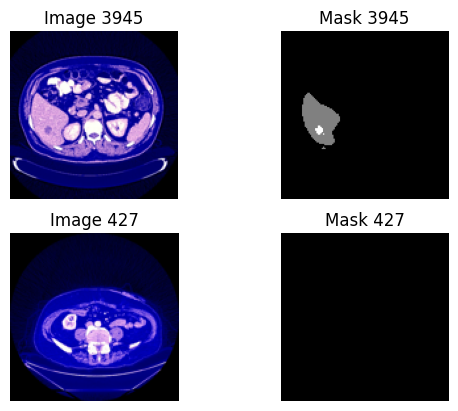

In [22]:
# Display two random images and masks
display_images_and_masks(train_images, train_masks)

## 7- Model Training
* ResNet50 Model
* Transfer Learning by ResNet50 Model

In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D

def build_model(input_shape=(128, 128, 3), num_classes=1, weights_path=None):
    # Load the ResNet50 model with the option to load pre-trained weights and excluding the top (fully connected) layers.
    base_model = ResNet50(weights=weights_path, include_top=False, input_tensor=Input(shape=input_shape))

    # Freeze the layers of the base model to prevent them from being updated during training.
    for layer in base_model.layers:
        layer.trainable = False

    # Start building the custom layers on top of the base model's output.
    x = base_model.output

    # Begin upsampling and adding convolutional layers to build the segmentation head.
    x = UpSampling2D((2, 2))(x)  # Upsample the feature map to increase its spatial dimensions.
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)  # Add a convolutional layer with 512 filters.
    x = UpSampling2D((2, 2))(x)  # Continue upsampling.
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)  # Add another convolutional layer with 256 filters.
    x = UpSampling2D((2, 2))(x)  # And so on...
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Add the final convolutional layer with a filter for each class (in this case, binary, so only 1 filter).
    x = Conv2D(num_classes, (1, 1), activation='sigmoid')(x)

    # Create the model object by specifying the inputs and outputs.
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model with an optimizer, loss function, and metrics to monitor.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Return the compiled model.
    return model

In [24]:
#calling the build_model function to create a new model based on the ResNet50 architecture
model = build_model(weights_path='/kaggle/input/resnet50/resnet50_weights.h5')

In [25]:
# Train the model using the training data.
# 'train_images' are the input images for training.
# 'train_masks' are the corresponding ground truth masks for the input images.
# 'batch_size' is set to 32, meaning the model will update weights after every 32 samples.
# 'epochs' is set to 10, meaning the model will go through the entire dataset 10 times.
# 'validation_data' is a tuple containing the validation dataset and its corresponding masks.
# The model's performance is evaluated on this validation dataset after each epoch.
history = model.fit(train_images, train_masks, batch_size=32, epochs=5, validation_data=(x_valid, y_valid))

Epoch 1/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 1475s 5s/step - accuracy: 0.9754 - loss: 0.0982 - val_accuracy: 0.9852 - val_loss: 0.0394
Epoch 2/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 1452s 5s/step - accuracy: 0.9854 - loss: 0.0343 - val_accuracy: 0.9712 - val_loss: 0.2094
Epoch 3/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 1454s 5s/step - accuracy: 0.9794 - loss: 0.0673 - val_accuracy: 0.9833 - val_loss: 0.0413
Epoch 4/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 1430s 5s/step - accuracy: 0.9875 - loss: 0.0292 - val_accuracy: 0.9869 - val_loss: 0.0340
Epoch 5/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 1472s 5s/step - accuracy: 0.9893 - loss: 0.0235 - val_accuracy: 0.9857 - val_loss: 0.0416


## 7.2 - Plot Training & Validation Loss Values

In [26]:
def plot_history(history):
    # Plot the training loss values
    plt.plot(history.history['loss'])
    # Plot the validation loss values
    plt.plot(history.history['val_loss'])
    # Set the title of the plot to 'Model loss'
    plt.title('Model loss')
    # Set the y-axis label of the plot to 'Loss'
    plt.ylabel('Loss')
    # Set the x-axis label of the plot to 'Epoch'
    plt.xlabel('Epoch')
    # Add a legend to the plot with labels 'Train' for training loss and 'Validation' for validation loss
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Display the plot
    plt.show()

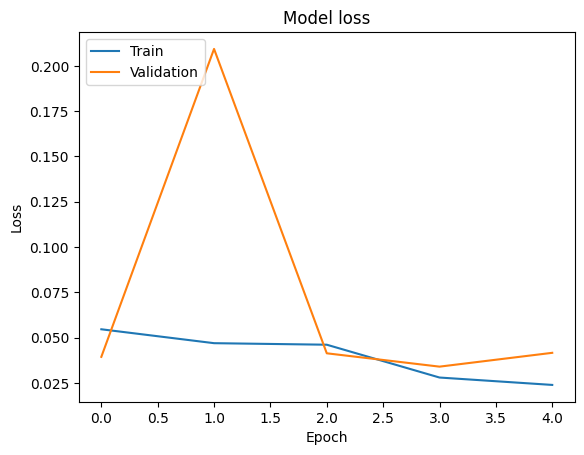

In [27]:
plot_history(history)

## 7.3 - Evaluate, Prediction & Score

In [28]:
# Evaluate the model using the validation dataset.
# 'x_valid' are the input images for validation.
# 'y_valid' are the corresponding ground truth masks for the validation images.
scores = model.evaluate(x_valid, y_valid)

# 'scores' is a list containing the loss as the first element and the accuracy as the second element.
# By accessing 'scores[1]', we retrieve the accuracy of the model on the validation dataset.
accuracy = scores[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9872 - loss: 0.0380


In [29]:
prediction = model.predict(x_test)# Use the trained model to make predictions on the test dataset.

# 'x_test' contains the input images for testing.
prediction = model.predict(x_test)

# 'prediction' will contain the output predictions for each input image in 'x_test'.
# For a segmentation model, this would typically be a mask indicating the segmented areas.

8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step


In [30]:
# Evaluate the model using the test data (x_test, y_test)
test_scores = model.evaluate(x_test, y_test)

# test_scores is a list that contains the loss as the first element and the accuracy as the second element.
# Here, we are accessing the second element, which is the accuracy of the model on the test data.
accuracy = test_scores[1]

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9868 - loss: 0.0370


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


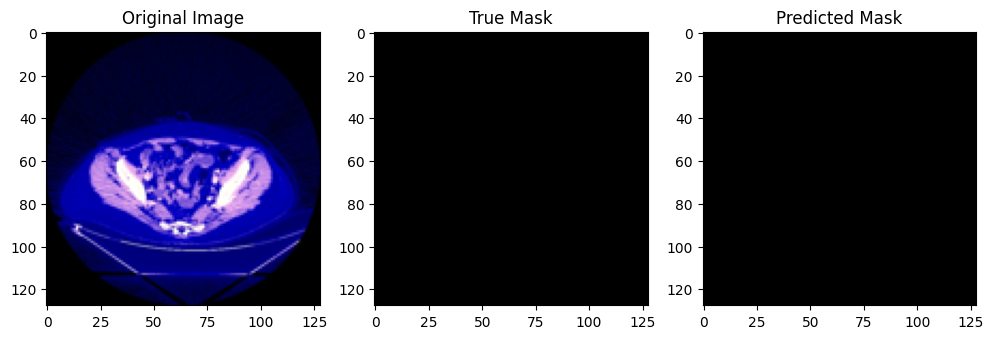

In [31]:
image_index = 44

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.5  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')

plt.show()

In [32]:
initial_segmentation_results = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


## 8 - U-Net Model

In [33]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the U-Net model architecture with detailed comments
def unet_model(input_layer):
    # Encoder
    # First convolutional block with 64 filters and relu activation, same padding keeps dimensions unchanged
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    # First pooling layer reduces spatial dimensions by half (downsampling)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    # Second convolutional block with 128 filters, following the downsampling
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    # Second pooling layer continues to reduce dimensions
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Decoder
    # Third convolutional block, placed in the decoder part with upsampling coming next
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    # Upsampling layer to increase the spatial dimensions to match those of conv2
    up1 = UpSampling2D((2, 2))(conv3)
    # Concatenation layer merges feature maps from encoder (conv2) with upsampled maps, crucial for U-Net architecture
    concat1 = concatenate([conv2, up1], axis=-1)
    
    # Fourth convolutional block after concatenation to refine features
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat1)
    # Final upsampling to increase the dimensions to match those of conv1
    up2 = UpSampling2D((2, 2))(conv4)
    # Final concatenation with the very first convolutional layer outputs
    concat2 = concatenate([conv1, up2], axis=-1)
    
    # Output layer with a single filter and sigmoid activation to produce a binary segmentation map
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(concat2)
    
    # Create the model instance with specified inputs and outputs
    model = Model(inputs=input_layer, outputs=outputs)
    return model

# Instantiate the U-Net model specifying the input shape
input_layer = Input(shape=(128, 128, 3), name='input_layer_1')
unet_model = unet_model(input_layer)

# Compile the model specifying optimizer, loss function, and metrics for evaluation
unet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the U-Net model on the provided training data, also include validation data for evaluating performance
unet_model.fit(train_images, train_masks, batch_size=32, epochs=5, validation_data=(x_valid, y_valid))

Epoch 1/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 979s 4s/step - accuracy: 0.9464 - loss: 0.2525 - val_accuracy: 0.9846 - val_loss: 0.0400
Epoch 2/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 971s 4s/step - accuracy: 0.9862 - loss: 0.0373 - val_accuracy: 0.9846 - val_loss: 0.0389
Epoch 3/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 954s 4s/step - accuracy: 0.9866 - loss: 0.0346 - val_accuracy: 0.9855 - val_loss: 0.0366
Epoch 4/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 1025s 4s/step - accuracy: 0.9866 - loss: 0.0340 - val_accuracy: 0.9859 - val_loss: 0.0340
Epoch 5/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 961s 4s/step - accuracy: 0.9879 - loss: 0.0299 - val_accuracy: 0.9868 - val_loss: 0.0311


## 8.1 - Evaluate Refined Segmentation Results

In [34]:
# Evaluate the performance of the trained U-Net model on the test dataset
evaluation = unet_model.evaluate(x_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 934ms/step - accuracy: 0.9883 - loss: 0.0287


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


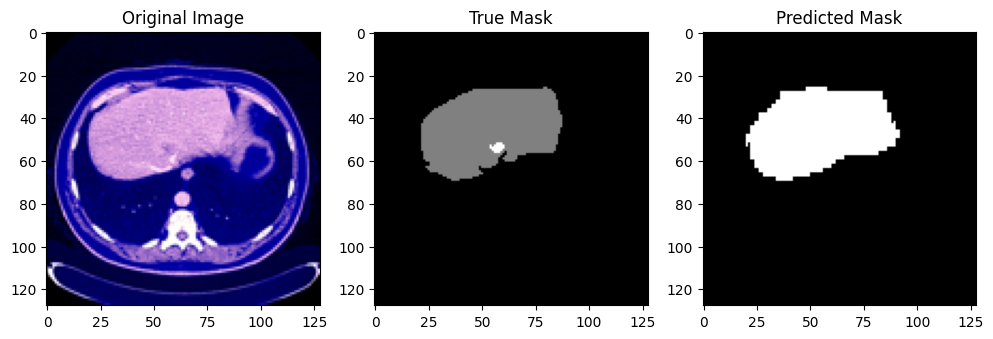

In [35]:
# Import the numpy library for numerical operations and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

# Select an index for the image to be visualized and analyzed
image_index = 45

# Load the image and corresponding true mask from the test dataset
input_image = x_test[image_index]  # The input image to the model
true_mask = y_test[image_index]    # The ground truth mask for the input image

# Obtain the predicted mask from the U-Net model
predicted_mask = unet_model.predict(np.expand_dims(input_image, axis=0))[0]  # Model prediction for the input image

# Apply a threshold to convert the predicted mask to a binary mask
threshold = 0.5  
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)  # Binary version of the predicted mask

# Set up the plotting environment with a figure size
plt.figure(figsize=(12, 4))

# Plot the original image in the first subplot
plt.subplot(1, 3, 1)
plt.imshow(input_image)  # Display the original image
plt.title('Original Image')  # Title for the first subplot

# Plot the true mask in the second subplot
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')  # Display the true mask in grayscale
plt.title('True Mask')  # Title for the second subplot

# Plot the predicted binary mask in the third subplot
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary[:, :, 0], cmap='gray')  # Display the binary predicted mask in grayscale
plt.title('Predicted Mask')  # Title for the third subplot

# Display the plots
plt.show()

In [36]:
# Save the entire model to a HDF5 file.
unet_model.save('unet_model.h5')